In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Final_Project_DatasetV2.csv")

In [3]:

df.rename(columns = {'Product ID': 'ProductID' , 'User ID': 'reviewerName' , 'Star Rating': 'overall', 'Review Title': 'summary','Review Content':'reviewText','Verified purchase?': 'verified','Helpful review?': 'vote'},inplace = True)


In [4]:
df.shape

(1892, 7)

In [5]:
df.head(5)

,ProductID,reviewerName,overall,summary,reviewText,verified,vote
0,7048911307,trapara,5.0,sound is great,I've had problems finding the right earbuds un...,Yes,0
1,7048911307,salatas123,5.0,ear buds,work great and very easy to use..,Yes,0
2,7048911307,camilo072010,5.0,Earpods,Work properly,Yes,0
3,5039309707,reyhouse77,4.0,Great for bicycling,"I like these wireless earphones, because they ...",yes,25
4,5039309707,josben-6575,5.0,If looking for a decent pair of wireless earbu...,The more i use them the more i like them. They...,yes,42


In [6]:
#check percentage of nulls per column
df.isna().sum()/len(df)

ProductID       0.000000
reviewerName    0.000000
overall         0.000529
summary         0.000000
reviewText      0.001057
verified        0.000000
vote            0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     1892 non-null   int64  
 1   reviewerName  1892 non-null   object 
 2   overall       1891 non-null   float64
 3   summary       1892 non-null   object 
 4   reviewText    1890 non-null   object 
 5   verified      1892 non-null   object 
 6   vote          1892 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 103.6+ KB


In [8]:
#Function for CLeaning
def cleanDF(dataframe):
  modified_df = dataframe.dropna(axis =0 , subset = ['reviewText'])
  
  modified_df['summary'].fillna(modified_df['reviewText'], inplace = True)
  modified_df['reviewerName'].fillna('Amazon Customer', inplace = True)
  modified_df["verified"] = df["verified"].str.lower()
  modified_df['overall'].fillna(0,inplace=True)
  map_dict = {'no':0, 'yes':1}
  modified_df['verified'] = modified_df['verified'].map(map_dict)
  modified_df = modified_df.reset_index().drop('index', axis=1)
  modified_df['verified'].fillna(0,inplace=True)
  return modified_df

In [9]:
clean_df=cleanDF(df)

/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-8-7ba4d6fdc991>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df["verified"] = df["verified"].str.lower()
<ipython-input-8-7ba4d6fdc991>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [10]:
clean_df.head(4)

,ProductID,reviewerName,overall,summary,reviewText,verified,vote
0,7048911307,trapara,5.0,sound is great,I've had problems finding the right earbuds un...,1.0,0
1,7048911307,salatas123,5.0,ear buds,work great and very easy to use..,1.0,0
2,7048911307,camilo072010,5.0,Earpods,Work properly,1.0,0
3,5039309707,reyhouse77,4.0,Great for bicycling,"I like these wireless earphones, because they ...",1.0,25


In [11]:
clean_df.isna().sum()

ProductID       0
reviewerName    0
overall         0
summary         0
reviewText      0
verified        0
vote            0
dtype: int64

In [12]:
clean_df.duplicated().sum()

16

In [13]:
clean_df[clean_df.duplicated()].head()

,ProductID,reviewerName,overall,summary,reviewText,verified,vote
380,5037099498,emer_8577,3.0,Doesn't show bluetooth availability,I don't know why there was a picture of a char...,1.0,16
701,7040743210,onik6645,2.0,"Great earbuds, terrible charging case.","The earbuds are really good for the price, but...",1.0,0
704,7040743210,tipipenk0,5.0,Great,These earphones are great for the price. The r...,1.0,0
705,7040743210,gasto-13,5.0,Great headphones,"These things are great, good sound, easy to co...",1.0,0
706,7040743210,tyger16,5.0,Great!,"Love these earphones! Easy to use, look cool a...",1.0,0


In [14]:
df[(df['reviewerName'] == 'emer_8577') & (df['ProductID'] == 5037099498)]

,ProductID,reviewerName,overall,summary,reviewText,verified,vote
369,5037099498,emer_8577,3.0,Doesn't show bluetooth availability,I don't know why there was a picture of a char...,Yes,16
382,5037099498,emer_8577,3.0,Doesn't show bluetooth availability,I don't know why there was a picture of a char...,Yes,16


In [15]:
clean_df.drop_duplicates(inplace=True)

In [16]:
print(f'Number of duplicates: {clean_df.duplicated().sum()}')
print(f'shape: {clean_df.shape}')

Number of duplicates: 0
shape: (1874, 7)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df.columns

Index(['ProductID', 'reviewerName', 'overall', 'summary', 'reviewText',
       'verified', 'vote'],
      dtype='object')

In [19]:
df["reviewerName"].value_counts()

mayvillage        4
2011merryshop     4
1478963ram        2
balsamus-0        2
victory36         2
                 ..
stamia-2012       1
gswiderski0mv2    1
uchugb-0          1
sher-8045         1
haywors_0         1
Name: reviewerName, Length: 1864, dtype: int64

In [20]:
np.quantile(df['reviewerName'].value_counts().values, np.arange(0,1.05,0.05)).astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4])

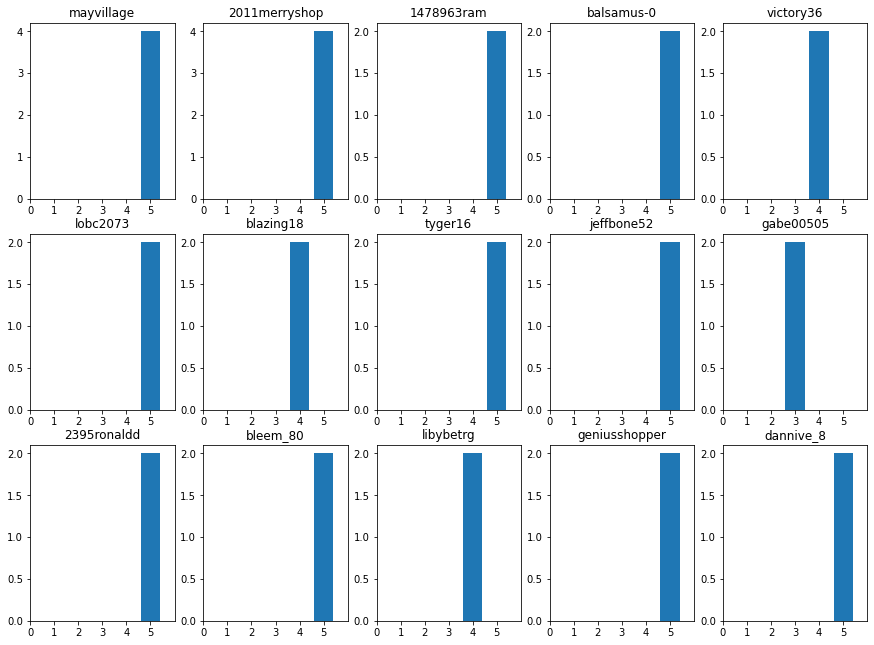

In [21]:
plt.subplots(3,5, figsize=(15,11))
for i in range(0,15):
    #get reviewers ID
    reviewer = df["reviewerName"].value_counts().index[i]
    #get value counts for each reviewer (the overall rating they give with each review)
    data = df['overall'][df['reviewerName'] == reviewer].value_counts()
    
    #now let's look at a couple different reviewers and their rating pattern
    plt.subplot(3,5,i+1)
    plt.bar(data.index, data.values)
    plt.title(reviewer)
    plt.xlim(0,6)
    plt.xticks(range(6))
plt.show()

In [22]:
map_numreviews = df['reviewerName'].value_counts().to_dict()
df['multipleReviews_reviewer'] = df['reviewerName'].map(map_numreviews)
df['multipleReviews_reviewer'] = np.where(df['multipleReviews_reviewer'] > 1, 1, 0)

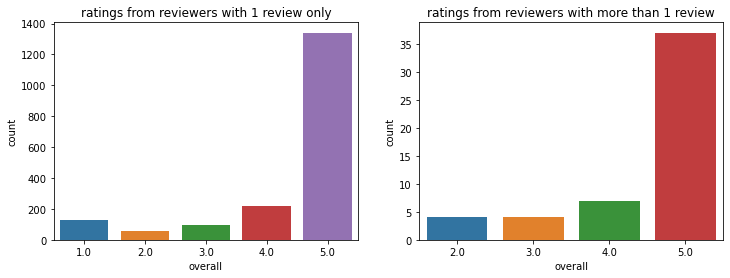

In [23]:
plt.subplots(1,2, figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(x='overall', data=df[df['multipleReviews_reviewer']==0])
plt.title('ratings from reviewers with 1 review only')

plt.subplot(1,2,2)
sns.countplot(x='overall', data=df[df['multipleReviews_reviewer']==1])
plt.title('ratings from reviewers with more than 1 review')

plt.show()

In [24]:
map_numreviews = df['ProductID'].value_counts().to_dict()
df['numReviews_product'] = df['ProductID'].map(map_numreviews)

In [25]:
df['nameProvided'] = np.where(df['reviewerName'] != 'Amazon Customer',1,0)

In [26]:
#adding word counts for review and summary columns

In [27]:
def featureEngin(dataframe):
  dataframe['review_word_count'] = dataframe['reviewText'].str.split().str.len()
  dataframe['summary_word_count'] = dataframe['summary'].str.split().str.len()
  map_numreviews = dataframe['reviewerName'].value_counts().to_dict()
  dataframe['multipleReviews_reviewer'] = dataframe['reviewerName'].map(map_numreviews)
  dataframe['multipleReviews_reviewer'] = np.where(dataframe['multipleReviews_reviewer'] > 1, 1, 0)
  #create new features that display if a reviewer only gave 5 star reviews or one star reviews
  map_five = dataframe['overall'].groupby(dataframe['reviewerName']).agg(lambda x: (np.unique(x)==5).all()).to_dict()
  map_one = dataframe['overall'].groupby(dataframe['reviewerName']).agg(lambda x: (np.unique(x)==1).all()).to_dict()
  dataframe['reviewer_five_star_only'] = dataframe['reviewerName'].map(map_five)
  dataframe['reviewer_one_star_only'] = dataframe['reviewerName'].map(map_one)
  dataframe['reviewer_five_star_only'] = dataframe['reviewer_five_star_only'].astype(int)
  dataframe['reviewer_one_star_only'] = dataframe['reviewer_one_star_only'].astype(int)
  map_numreviews = dataframe['ProductID'].value_counts().to_dict()
  dataframe['numReviews_product'] = dataframe['ProductID'].map(map_numreviews)
  dataframe['nameProvided'] = np.where(dataframe['reviewerName'] != 'Amazon Customer',1,0)
  return dataframe

In [28]:
clean_data = featureEngin(clean_df)

### Data Exploration


<Figure size 432x288 with 0 Axes>

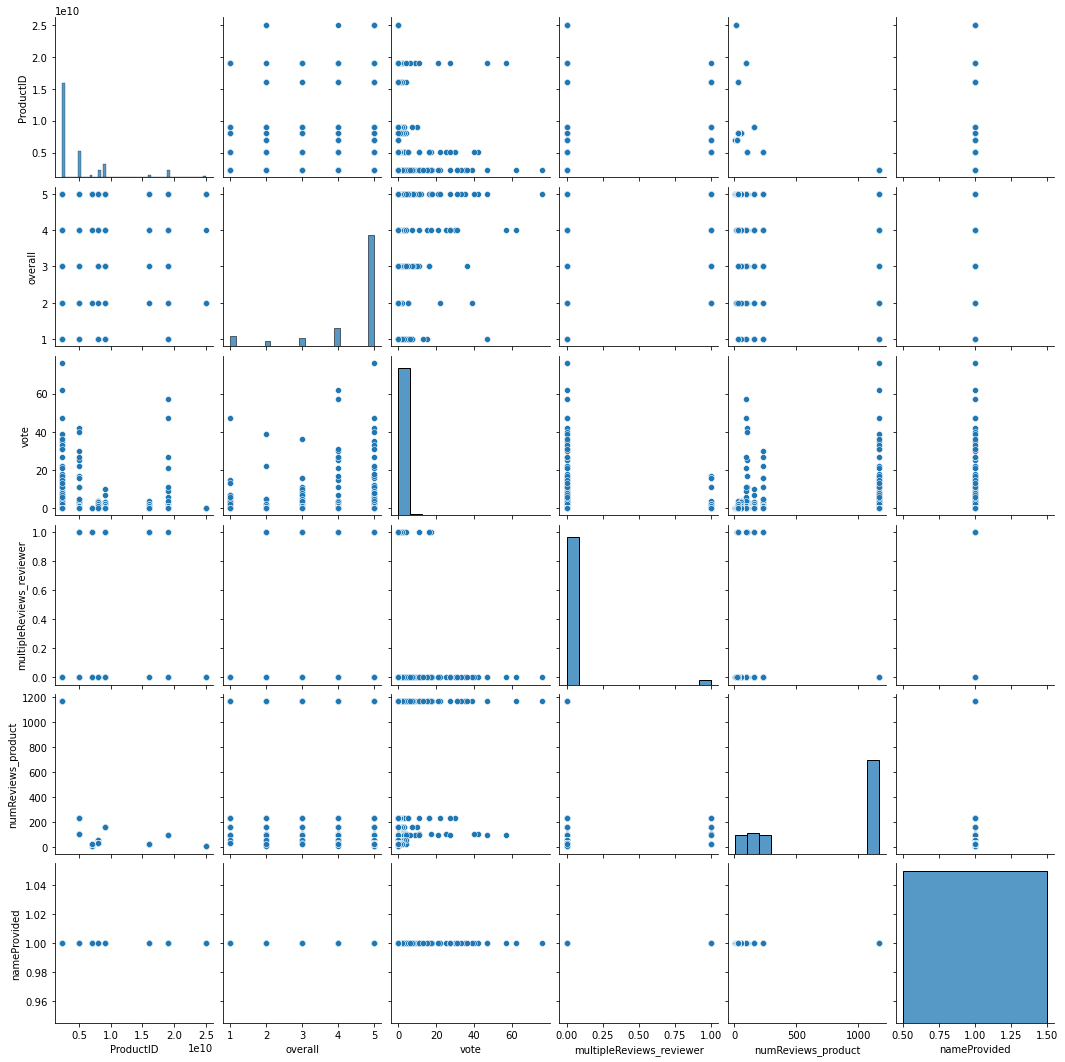

In [29]:
plt.figure()
sns.pairplot(df)
plt.show()

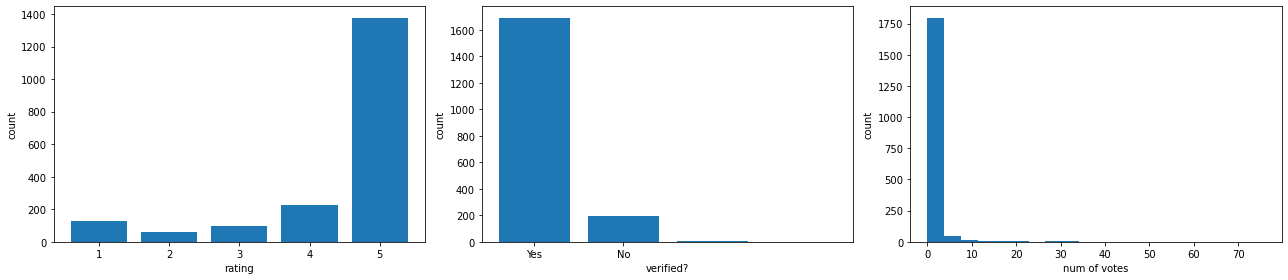

In [30]:
plt.subplots(1,3, figsize=(18,4))

plt.subplot(1,3,1)
plt.bar(df['overall'].value_counts().index, df['overall'].value_counts().values)
plt.xlabel('rating')
plt.ylabel('count')

plt.subplot(1,3,2)
plt.bar(df['verified'].value_counts().index, df['verified'].value_counts().values)
plt.xlabel('verified?')
plt.ylabel('count')
plt.xticks(range(0,2))

plt.subplot(1,3,3)
plt.hist(df['vote'], bins=20)
plt.xlabel('num of votes')
plt.ylabel('count')

plt.tight_layout()
plt.show()

In [31]:
print(f'Reviews: {len(df)}')
print(f'Products: {len(df["ProductID"].value_counts())}') 
print(f'Reviewers: {len(df["reviewerName"].value_counts())}')

Reviews: 1892
Products: 11
Reviewers: 1864


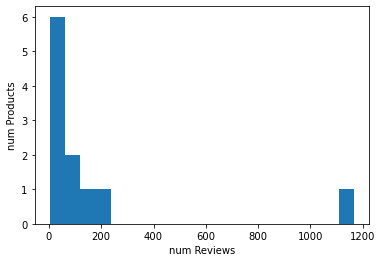

In [32]:
plt.figure()
plt.hist(df['ProductID'].value_counts().values, bins=20)
plt.xlabel('num Reviews')
plt.ylabel('num Products')
plt.show()

In [33]:
np.quantile(df['ProductID'].value_counts().values, np.arange(0,1.05,0.05)).astype(int)

array([   3,    6,   10,   15,   20,   22,   25,   27,   30,   43,   56,
         74,   93,   96,  100,  129,  159,  194,  229,  698, 1167])

2. Temporal trends
Let's explore if there were any trends over time in the data.

Is there a trend between year and number of verified purchases?


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.datasets import load_files

In [35]:
import functions_library as fl

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/shreya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
min_df_list = range(20,20,25)
numTokens_lem = []
numTokens_stem = []

for i in min_df_list:
    print(f'beginning tokenization with min_df = {i}')
    tokens_l = (fl.tfidf(clean_data['reviewText'], tokenizer=fl.spl_tokenizer, min_df=30, ngram_range=(1,2))).shape[1]
    print(f'vectorization with lemmatization for min_df = {i} complete')
    tokens_s = (fl.tfidf(clean_data['reviewText'], tokenizer=fl.sps_tokenizer, min_df=i, ngram_range=(1,2))).shape[1]
    print(f'vectorization with stemming for min_df = {i} complete')

    #appending number of tokens to the appropriate list
    numTokens_lem.append(tokens_l)
    numTokens_stem.append(tokens_s)
    print(f'number of tokens appending to corresponding list. min_df = {i} complete')

   
    

2. Scaling non-token Features


In [41]:
df2=df.select_dtypes(include=['int32','int64'])

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
mm = MinMaxScaler()

In [44]:
df3 = mm.fit_transform(df2)

In [45]:
pd.DataFrame(df3, columns = df2.columns).describe()

,ProductID,vote,multipleReviews_reviewer,numReviews_product,nameProvided
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.0
mean,0.109326,0.011593,0.027484,0.661927,0.0
std,0.195415,0.058726,0.163533,0.430777,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.134021,0.0
50%,0.000000,0.000000,0.000000,1.000000,0.0
75%,0.120467,0.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0


RobustScaler


In [46]:
from sklearn.preprocessing import RobustScaler

In [47]:
rs = RobustScaler(with_centering=False)

In [48]:
df3 = rs.fit_transform(df2)

In [49]:
pd.DataFrame(df3, columns=df2.columns).describe()


,ProductID,vote,multipleReviews_reviewer,numReviews_product,nameProvided
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.0
mean,1.748332,0.881078,0.027484,0.767344,1.0
std,1.622145,4.463154,0.163533,0.497444,0.0
min,0.840810,0.000000,0.000000,0.002976,1.0
25%,0.840810,0.000000,0.000000,0.157738,1.0
50%,0.840810,0.000000,0.000000,1.157738,1.0
75%,1.840810,0.000000,0.000000,1.157738,1.0
max,9.141836,76.000000,1.000000,1.157738,1.0


StandardScaler


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss = StandardScaler()

In [52]:
df3 = ss.fit_transform(df2)

In [53]:
pd.DataFrame(df3, columns = df2.columns).describe()

,ProductID,vote,multipleReviews_reviewer,numReviews_product,nameProvided
count,1.892000e+03,1.892000e+03,1.892000e+03,1.892000e+03,1892.0
mean,5.667067e-15,8.177039e-17,8.463690e-16,-1.193044e-14,0.0
std,1.000264e+00,1.000264e+00,1.000264e+00,1.000264e+00,0.0
min,-5.596057e-01,-1.974637e-01,-1.681097e-01,-1.536997e+00,0.0
25%,-5.596057e-01,-1.974637e-01,-1.681097e-01,-1.225800e+00,0.0
50%,-5.596057e-01,-1.974637e-01,-1.681097e-01,7.850064e-01,0.0
75%,5.702491e-02,-1.974637e-01,-1.681097e-01,7.850064e-01,0.0
max,4.559061e+00,1.683535e+01,5.948497e+00,7.850064e-01,0.0


Part 5: PCA and Modelling

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
import functions_library as fl

In [56]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/shreya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:

review_tokens = fl.tfidf(clean_data['reviewText'], tokenizer=fl.spl_tokenizer, ngram_range=(1,2), min_df=10)

In [61]:
summary_tokens = fl.tfidf(df['summary'], tokenizer=fl.spl_tokenizer, ngram_range=(1,2), min_df=5)

2. Scale numeric features
Will be using the MinMaxScaler to scale the non-token features.

In [62]:
df2=df.select_dtypes(include=['int32','int64'])

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
mm = MinMaxScaler()

In [65]:
df3 = mm.fit_transform(df2)

In [66]:
df_scaled = pd.DataFrame(df3, columns = df2.columns)

In [67]:
df_scaled.shape

(1892, 5)

In [68]:
del df3, df2


In [69]:
df_final = pd.concat([df_scaled, review_tokens, summary_tokens], axis = 1)

In [70]:
df_final.tail()

,ProductID,vote,multipleReviews_reviewer,numReviews_product,nameProvided,r_1,r_10,r_100,r_1st,r_2,...,s_work,s_work s_great,s_work s_well,s_worked,s_working,s_worth,s_worth s_money,s_would,s_wow,s_yet
1887,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1888,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1889,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1890,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1891,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from sklearn.decomposition import PCA

In [72]:
df_final.fillna(999,inplace=True)


In [73]:
pca = PCA(n_components=500)
pcs = pca.fit_transform(df_final)

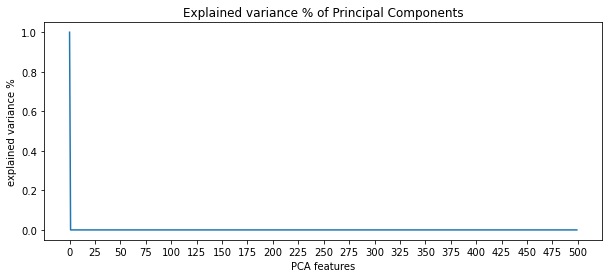

In [74]:
plt.figure(figsize=(10,4))
plt.plot(range(500), pca.explained_variance_ratio_[0:500])
plt.xlabel('PCA features')
plt.ylabel('explained variance %')
plt.xticks(range(0,501,25))
plt.title('Explained variance % of Principal Components')
plt.show()

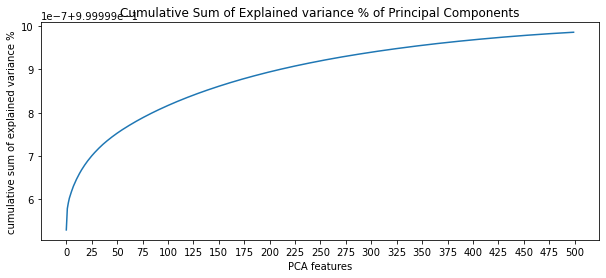

In [75]:
plt.figure(figsize=(10,4))
plt.plot(range(500), pca.explained_variance_ratio_.cumsum()[0:500])
plt.xlabel('PCA features')
plt.ylabel('cumulative sum of explained variance %')
plt.xticks(range(0,501,25))
plt.title('Cumulative Sum of Explained variance % of Principal Components')
plt.show()

In [76]:
pca.explained_variance_ratio_.cumsum()[300]

0.9999999398517163

In [77]:
pca.explained_variance_ratio_.cumsum()[350]

0.9999999557447412

In [78]:
pca.explained_variance_ratio_.cumsum()[400]

0.9999999684107685

In [79]:
PCA_components = pd.DataFrame(pcs)

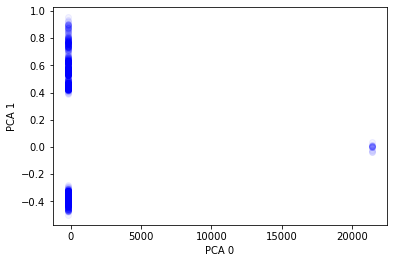

In [80]:
plt.figure()
plt.scatter(PCA_components[0],PCA_components[1], alpha=.05, color='blue')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.show()

KMeans Clustering


In [81]:
from sklearn.cluster import KMeans

In [82]:
k_values = range(8,32)
inertia_scores = []

for k in k_values:
    #instantiate
    kmeans_model = KMeans(n_clusters=k, verbose=1)
    #fitting on first 350 PCs
    kmeans_model.fit(PCA_components.iloc[:,0:350])
    #get scores and append them
    inertia = kmeans_model.inertia_
    #append score
    inertia_scores.append(inertia)

Initialization complete
Iteration 0, inertia 4942.0269884118115
Iteration 1, inertia 3084.8669350438995
Converged at iteration 1: center shift 0.2847038628035902 within tolerance 1.2601745588292477.
Initialization complete
Iteration 0, inertia 5047.8456907682075
Iteration 1, inertia 3014.7930497810826
Converged at iteration 1: center shift 0.22064531605923327 within tolerance 1.2601745588292477.
Initialization complete
Iteration 0, inertia 5568.950747326094
Iteration 1, inertia 3066.877410864492
Converged at iteration 1: center shift 0.19449087211922744 within tolerance 1.2601745588292477.
Initialization complete
Iteration 0, inertia 5083.097540738391
Iteration 1, inertia 3082.1765523802146
Converged at iteration 1: center shift 0.28109745006864756 within tolerance 1.2601745588292477.
Initialization complete
Iteration 0, inertia 5070.541958846016
Iteration 1, inertia 3126.285005067376
Converged at iteration 1: center shift 0.44226898397226133 within tolerance 1.2601745588292477.
Initia

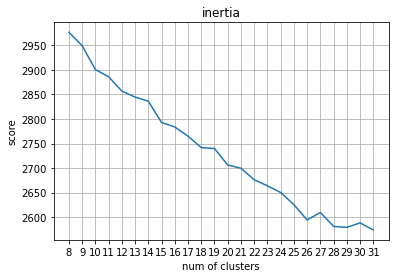

In [83]:
plt.figure()
plt.plot(k_values, inertia_scores)
plt.xlabel('num of clusters')
plt.ylabel('score')
plt.title('inertia')
plt.xticks(k_values)
plt.grid()
#plt.ylim(0,580000)
plt.show()

K-Means Cluster


In [84]:
kmeans_model25 = KMeans(n_clusters=25, verbose=1)
#fitting KMeans on first 350 PCs
kmeans_model25.fit(PCA_components.iloc[:,0:350])

Initialization complete
Iteration 0, inertia 3571.011569142295
Iteration 1, inertia 2753.9219771130042
Converged at iteration 1: center shift 0.7686357844552967 within tolerance 1.2601745588292477.
Initialization complete
Iteration 0, inertia 4084.099796928226
Iteration 1, inertia 2680.6573771416433
Converged at iteration 1: center shift 0.4885276903788901 within tolerance 1.2601745588292477.
Initialization complete
Iteration 0, inertia 3948.9132928606473
Iteration 1, inertia 2658.779466641256
Converged at iteration 1: center shift 0.6246805127673402 within tolerance 1.2601745588292477.
Initialization complete
Iteration 0, inertia 3608.7471033275633
Iteration 1, inertia 2759.2011973340673
Iteration 2, inertia 2669.9142751701106
Converged at iteration 2: center shift 0.20893707124824498 within tolerance 1.2601745588292477.
Initialization complete
Iteration 0, inertia 4013.225916576386
Iteration 1, inertia 2686.632638532911
Converged at iteration 1: center shift 0.7891354768882446 within

KMeans(n_clusters=25, verbose=1)

In [85]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=25, n_init=10,
       random_state=None, tol=0.0001, verbose=1)

KMeans(n_clusters=25, verbose=1)

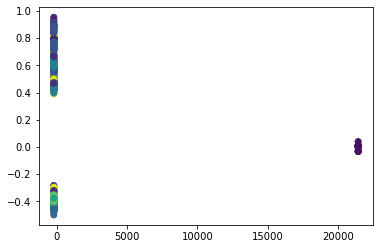

In [86]:
plt.figure()
plt.scatter(PCA_components[0],PCA_components[1], c=kmeans_model25.labels_)
plt.show()

In [87]:
df_final.head()

,ProductID,vote,multipleReviews_reviewer,numReviews_product,nameProvided,r_1,r_10,r_100,r_1st,r_2,...,s_work,s_work s_great,s_work s_well,s_worked,s_working,s_worth,s_worth s_money,s_would,s_wow,s_yet
0,0.208900,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.208900,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.208900,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.120467,0.328947,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.120467,0.552632,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.341895,0.0,0.0,0.0,0.0


In [88]:
non_tokens_clust = list(df_final.columns[0:12]) + ['cluster']

In [104]:
non_tokens_clust

['ProductID',
 'vote',
 'multipleReviews_reviewer',
 'numReviews_product',
 'nameProvided',
 'r_1',
 'r_10',
 'r_100',
 'r_1st',
 'r_2',
 'r_20',
 'r_2nd',
 'cluster']

In [95]:
tokens_clust = list(df_final.columns[12:])